# Modul 8 Struktur Data: *Binary Tree*, *binary search tree* (BST), dan *$m$-ary tree*,

Kembali ke [Struktur Data (dengan Python)](strukdat2023.qmd)

In [6]:
import numpy as np
import graphviz as gv

## *Binary Tree* dengan *array*

In [68]:
class ArrayBintree:
    def __init__(self, dtype, height, emptydata=-9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height+1) - 1
        self.array = np.empty(self.array_size, dtype=dtype)
        for i in range(self.array_size):
            self.array[i] = self.emptydata
    
    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data
    
    def set_root(self, newdata):
        self.array[0] = newdata
    
    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("Error get_data: indeks di luar ukuran tree")
    
    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("Error set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx, rec=0):
        idx = 2*node_idx + 1
        if idx < self.array_size:
            if rec == 0:
                return idx
            else:
                return self.get_left_child_idx(idx, rec=rec-1)
        else:
            return -1
    
    def get_left_child(self, node_idx):
        return self.array[self.get_left_child_idx(node_idx)]
    
    def get_right_child_idx(self, node_idx, rec=0):
        idx = 2*node_idx + 2
        if idx < self.array_size:
            if rec == 0:
                return idx
            else:
                return self.get_right_child_idx(idx, rec=rec-1)
        else:
            return -1
    
    def get_right_child(self, node_idx):
        return self.array[self.get_right_child_idx(node_idx)]

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = np.floor( (node_idx - 1)/2 )
        return idx

    def get_preorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        left_idx = self.get_left_child_idx(current)
        right_idx = self.get_right_child_idx(current)
        
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if left_idx != -1:
            self.get_preorder(current=left_idx, result=result)
        
        if right_idx != -1:
            self.get_preorder(current=right_idx, result=result)
        
        if is_starting_node:
            return result
    
    def get_inorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        left_idx = self.get_left_child_idx(current)
        right_idx = self.get_right_child_idx(current)

        if left_idx != -1:
            self.get_inorder(current=left_idx, result=result)

        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)
        
        if right_idx != -1:
            self.get_inorder(current=right_idx, result=result)
        
        if is_starting_node:
            return result

    def get_postorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        left_idx = self.get_left_child_idx(current)
        right_idx = self.get_right_child_idx(current)

        if left_idx != -1:
            self.get_postorder(current=left_idx, result=result)
        
        if right_idx != -1:
            self.get_postorder(current=right_idx, result=result)
        
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)
        
        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label=str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label="NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label="NULL", shape="none")
        return digraph

In [69]:
test = ArrayBintree(int, 2)

In [70]:
print(test.array)

[-9999 -9999 -9999 -9999 -9999 -9999 -9999]


In [71]:
test.set_root(10)

In [72]:
test.set_data(test.get_left_child_idx(0), 5)

In [73]:
test.set_data(test.get_right_child_idx(0), 19)

In [74]:
test.set_data(test.get_left_child_idx(0, 1), 39)

In [75]:
test.set_data(test.get_right_child_idx(0, 1), 87)

In [76]:
print(test.array)

[   10     5    19    39 -9999 -9999    87]


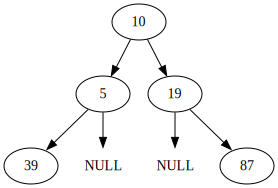

In [77]:
display(test.get_digraph_simple())

In [34]:
test.get_preorder()

[10, 5, 39, 19, 87]

In [35]:
test.get_inorder()

[39, 5, 10, 19, 87]

In [ ]:
test.get_preorder()

In [36]:
test.get_postorder()

[39, 5, 87, 19, 10]

## *Binary Tree* dengan *pointer*

In [1]:
class BintreeNode:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right